## convert text to features<br>
Process of machine understandable format(numbers) and MLDL dependent on the type feature engineering technique used.

## 1. One Hot encoding<br>
Convert categorical variables into features or columns;

In [1]:
import pandas as pd

In [4]:
text = "I am learing NLP and I like it"

print(pd.get_dummies(text.split()))

   I  NLP  am  and  it  learing  like
0  1    0   0    0   0        0     0
1  0    0   1    0   0        0     0
2  0    0   0    0   0        1     0
3  0    1   0    0   0        0     0
4  0    0   0    1   0        0     0
5  1    0   0    0   0        0     0
6  0    0   0    0   0        0     1
7  0    0   0    0   1        0     0


## 2. converting text to features using Count vectorizing<br>
works like counter dictionarya and similar to one hot encode and it counts.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["I love NLP and I will learn NLP in 2month "]

#create transform
vectorizer = CountVectorizer()

#tokenizing
vectorizer.fit(text)

#encode document
vector = vectorizer.transform(text)

#summarize and generating output
print(vectorizer.vocabulary_)
print(vector.toarray() ) # NLP appeared twice



{'love': 4, 'nlp': 5, 'and': 1, 'will': 6, 'learn': 3, 'in': 2, '2month': 0}
[[1 1 1 1 1 2 1]]


## 3. Generating N-grams<br>
for example: consider the word "not bad". this conveying 'good' i.e., actually a word. <br>
N-grams are the fusion of multiple letters or multiple words and captured the next and previous words.<br>
Unigrams: Unique words. "I am learning NLP"<br>
Bigrams: 2 words. "I am" "am learning", "learning NLP"<br>
Trigram: 3 words. "I am learning", "am learning NLP" and so on.<br>

Using TextBlob() <br>




In [7]:
from textblob import TextBlob

text = " I am learning NLP"
TextBlob(text).ngrams(1)

[WordList(['I']), WordList(['am']), WordList(['learning']), WordList(['NLP'])]

In [8]:
TextBlob(text).ngrams(2)

[WordList(['I', 'am']),
 WordList(['am', 'learning']),
 WordList(['learning', 'NLP'])]

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["I love NLP and I will learn NLP in 2month "]

#create the transform
vectorizer = CountVectorizer(ngram_range=(2,2))
#tokenizing
vectorizer.fit(text)
#encode document
vector = vectorizer.transform(text)

#summarize and generating output
print(vectorizer.vocabulary_)
print(vector.toarray()) # count is one for all features

{'love nlp': 3, 'nlp and': 4, 'and will': 0, 'will learn': 6, 'learn nlp': 2, 'nlp in': 5, 'in 2month': 1}
[[1 1 1 1 1 1 1]]


## 4. Generating Co-occurrence Matrix <br>
it's like a count vectorizer where it is counts the occurrence of the words together, instead of individual works. <br>
Using nltk, bigrams.

In [12]:
import numpy as np
import nltk
from nltk import bigrams
import itertools

In [13]:

def co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_to_index = { word:i for i, word in enumerate(vocab) }
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_to_index[current]
        pos_previous = vocab_to_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
    # return the matrix and the index
    return co_occurrence_matrix,vocab_to_index

In [31]:
sentences = [['I', 'love', 'nlp'],
                   ['I', 'love','to' 'learn'],
                   ['nlp', 'is', 'future'],
                   ['nlp', 'is', 'cool']]


merged = list(itertools.chain.from_iterable(sentences))
#print(merged)

matrix, vocab_to_index = co_occurrence_matrix(merged)

CoMatrixFinal = pd.DataFrame(matrix, index=list(vocab_to_index.keys()), columns=list(vocab_to_index.keys()) )
print( CoMatrixFinal )

         future   is    I  love  tolearn  cool  nlp
future      0.0  1.0  0.0   0.0      0.0   0.0  0.0
is          0.0  0.0  0.0   0.0      0.0   0.0  2.0
I           0.0  0.0  0.0   0.0      0.0   0.0  1.0
love        0.0  0.0  2.0   0.0      0.0   0.0  0.0
tolearn     0.0  0.0  0.0   1.0      0.0   0.0  0.0
cool        0.0  1.0  0.0   0.0      0.0   0.0  0.0
nlp         1.0  0.0  0.0   1.0      1.0   0.0  0.0


## 5. hash vectorizing<br>
A count vectorizer and co-occurrence matrix have one limitation though. In these methods, the vocabulary can become very large and cause memory/computation issues.<br>
Solution: Use Hash Vectorizing.<br>


In [33]:
from sklearn.feature_extraction.text import HashingVectorizer


text = ["The quick brown fox jumped over the lazy dog."]

# transform
vectorizer = HashingVectorizer(n_features=10)

#create the hashing vector
vector = vectorizer.transform(text)

#summarize the vector
print(vector.shape)
print(vector.toarray() )


(1, 10)
[[ 0.          0.57735027  0.          0.          0.          0.          0.
  -0.57735027 -0.57735027  0.        ]]


## 6. Converting Text to Features Using TF-IDF <br>

Let's say a particular word is appearing in all doc of the corpus,then it will achieve higher importance in previous methods. That's bad for analysis.<br>
Main use of TF-IDF is to reflect on how important a word is to a doc in a collection, and hence normalizing words appeared frequently in all doc's.<br>

**Term Frequency(TF)** is the ratio of the count of a word present in a sentence,to the length of the sentence.<br>
TF is basically capturing the importance of the word irrespective of the length of the document. For example, a word with the frequency of 3 with the length of sentence being 10 is not the same as when the word length of sentence is 100 words. It should get more importance in the first scenario; that is what TF does.<br>
Inverse Document Frequency (IDF): IDF of each word is the log of the ratio of the total number of rows to the number of rows in a particular document in which that word is present.<br>
IDF = log(N/n), where N is the total number of rows and n is the number of rows in which the word was present.<br>



In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = ["The quick brown fox jumped over the lazy dog.", "The dog.", "The fox"]

#Create the transform
vectorizer = TfidfVectorizer()
#Tokenize and build vocab
vectorizer.fit(text)

#Summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[ 1.69314718  1.28768207  1.28768207  1.69314718  1.69314718  1.69314718
  1.69314718  1.        ]


All these methods or techniques are based on frequency.so called freq-based embeddings or features.Next methods are prediction-based embeddings or word embeddings.

## 7. Implementing word Embeddings<br>

Challenges so far: All these techniques are fail to capture the context and meaning of the words and depends on frequency of the words.But, need to capture the context or semantic relations. <br>
a. I am eating an apple.<br>
b. I am using an apple. <br>

Above have different meaning eating and using. <br>

Word embeddings are prediction based and they use shallow neural networks(less no.of hidden layers) to train the model will lead to learning the weight and using them as a vector representation.<br>

**word2vec**: dl Google framework to train word embeddings and two types.<br>
1. Skip-Gram: used to predict the probabilities of a word given the context of word or words<br>
2. Continous Bag of Words(CBOW)<br>

In [36]:
sentences = [['I', 'love', 'nlp'],
                  ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
                  ['nlp', 'is', 'future'],
                  ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
                  ['nlp', 'uses', 'machine', 'learning']]

In [37]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [38]:
skipgram = Word2Vec(sentences, size =50, window = 3, min_count=1,sg = 1)
print(skipgram)

# acces vector for one word
print(skipgram['nlp'])

Word2Vec(vocab=21, size=50, alpha=0.025)
[ -9.13425162e-03   2.60170992e-03  -8.73867795e-03  -9.41455737e-03
   4.14813869e-03   5.48655540e-03  -6.56432472e-03  -5.46183484e-03
  -8.42855126e-03   9.77669656e-03  -2.63084611e-03  -9.03810374e-03
   9.02269036e-03  -6.06063800e-03   1.18132576e-03  -9.01519496e-04
   3.76255158e-03   9.04142205e-03  -2.29921937e-03  -1.75186340e-03
   7.10002612e-03  -3.96874594e-03  -2.19836528e-03   7.72812217e-03
  -8.36534891e-05   9.22895409e-03   4.76060156e-03  -3.81887890e-03
  -9.79437307e-03  -2.08108639e-03   6.35557575e-03   9.49393120e-03
   1.97817897e-03   2.02932185e-03  -6.08886639e-03  -2.55525834e-03
  -2.51340051e-03   1.84126070e-03   1.20144396e-03  -8.49854201e-03
  -8.49195197e-03  -8.54768965e-04   6.16398687e-03  -2.24096049e-03
   9.43080615e-03   1.86003593e-03   8.26057512e-03   5.41951926e-03
  -7.23493332e-03   8.02617148e-03]


/home/harsha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


since vector size parameter was 50, the model gives a vector is size for each word.

In [40]:
# access vector for another one word
print(skipgram['deep']) # word not present

/home/harsha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


KeyError: "word 'deep' not in vocabulary"

**Method 2:** using T-SNE is one of the ways to evaluate word embeddings.

In [41]:
# save model
skipgram.save('skipgram.bin')

In [42]:
# laod model
skipgram = Word2Vec.load('skipgram.bin')

In [43]:
# T - SNE plot

X = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/home/harsha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


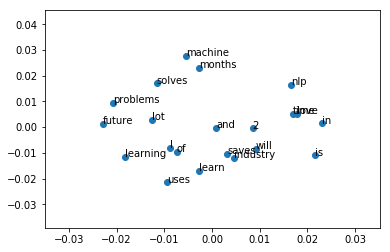

In [44]:
pyplot.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)
for i, word in enumerate(words):
       pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

**Continuous Bag of Words (CBOW)**

In [45]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [47]:
sentences = [['I', 'love', 'nlp'],
                   ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
                   ['nlp', 'is', 'future'],
                   ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
                   ['nlp', 'uses', 'machine', 'learning']]

In [48]:
# training the model
cbow = Word2Vec(sentences, size =50, window = 3, min_count=1,sg = 1)
print(cbow)

Word2Vec(vocab=21, size=50, alpha=0.025)


In [49]:
# access vector for one word
print(cbow['nlp'])

[ -9.13425162e-03   2.60170992e-03  -8.73867795e-03  -9.41455737e-03
   4.14813869e-03   5.48655540e-03  -6.56432472e-03  -5.46183484e-03
  -8.42855126e-03   9.77669656e-03  -2.63084611e-03  -9.03810374e-03
   9.02269036e-03  -6.06063800e-03   1.18132576e-03  -9.01519496e-04
   3.76255158e-03   9.04142205e-03  -2.29921937e-03  -1.75186340e-03
   7.10002612e-03  -3.96874594e-03  -2.19836528e-03   7.72812217e-03
  -8.36534891e-05   9.22895409e-03   4.76060156e-03  -3.81887890e-03
  -9.79437307e-03  -2.08108639e-03   6.35557575e-03   9.49393120e-03
   1.97817897e-03   2.02932185e-03  -6.08886639e-03  -2.55525834e-03
  -2.51340051e-03   1.84126070e-03   1.20144396e-03  -8.49854201e-03
  -8.49195197e-03  -8.54768965e-04   6.16398687e-03  -2.24096049e-03
   9.43080615e-03   1.86003593e-03   8.26057512e-03   5.41951926e-03
  -7.23493332e-03   8.02617148e-03]


/home/harsha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


/home/harsha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


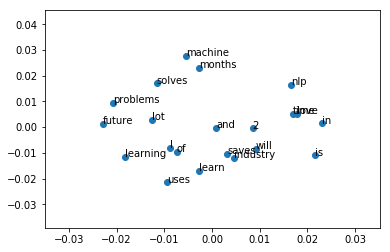

In [50]:
# save model
cbow.save('cbow.bin')

# load model
cbow = Word2Vec.load('cbow.bin')

# T – SNE plot
X = cbow[cbow.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(cbow.wv.vocab)
for i, word in enumerate(words):
       pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

Use Google's pre-trained model https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit

In [ ]:
import gensim

# load the saved model
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
# checking how similarity works.
print(model.similarity('this','is'))



In [ ]:
#Lets check one more.
print (model.similarity('post', 'book'))

In [ ]:
# Finding the odd one out.
model.doesnt_match('breakfast cereal dinner lunch';.split())

In [ ]:
# It is also finding the relations between words.
word_vectors.most_similar(positive=['woman', 'king'], negative=['man'])

## 8 Implementing fastText<br>
DL facebook framework.<br>

In [58]:
from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [59]:
sentences = [['I', 'love', 'nlp'],
                   ['I', 'will', 'learn', 'nlp', 'in', '2','months'],
                   ['nlp', 'is', 'future'],
                   ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry', 'problems'],
                   ['nlp', 'uses', 'machine', 'learning']]

In [60]:
fast = FastText(sentences,size=20, window=1, min_count=1, workers=5, min_n=1, max_n=2)
print(fast['nlp'])

[ 0.00145743 -0.006103   -0.01052622 -0.00311103 -0.00338806  0.02404632
 -0.00938473  0.00470077 -0.00037666 -0.00319065 -0.01831873 -0.00377998
 -0.00250528 -0.0063827   0.00522308  0.01522697  0.02165839 -0.00143036
 -0.00438009  0.00490688]


/home/harsha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [62]:
print(fast['deep']) # not presents still generate the model using character


[-0.00551768 -0.00133838 -0.00853625  0.00362653 -0.0089807   0.022962
 -0.00074487  0.00164554 -0.02352585 -0.00652109 -0.0067275   0.01114251
  0.00089385 -0.02170741 -0.00463046 -0.00650469  0.00407186  0.01711867
 -0.00594492 -0.01274448]


/home/harsha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
# load model
fast = Word2Vec.load('fast.bin')
# visualize
X = fast[fast.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [ ]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(fast.wv.vocab)
for i, word in enumerate(words):
      pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()